<a href="https://colab.research.google.com/github/gapras94/Traffic-Sign-Recognition-using-Deep-CNN/blob/master/traffic_sign_recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [0]:
import keras
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sn
import cv2
import pickle
import pandas as pd
import numpy as np
import random

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Importing datasets and exploring


In [0]:
!git clone https://bitbucket.org/jadslim/german-traffic-signs

fatal: destination path 'german-traffic-signs' already exists and is not an empty directory.


In [0]:
data = pd.read_csv('/content/german-traffic-signs/signnames.csv')

In [0]:
data

,ClassId,SignName
0,0,Speed limit (20km/h)
1,1,Speed limit (30km/h)
2,2,Speed limit (50km/h)
3,3,Speed limit (60km/h)
4,4,Speed limit (70km/h)
5,5,Speed limit (80km/h)
6,6,End of speed limit (80km/h)
7,7,Speed limit (100km/h)
8,8,Speed limit (120km/h)
9,9,No passing


Pickling the dataset

In [0]:
with open('/content/german-traffic-signs/train.p',mode='rb') as training:
  train = pickle.load(training)

with open('/content/german-traffic-signs/valid.p',mode='rb') as validation:
  valid = pickle.load(validation)

with open('/content/german-traffic-signs/test.p',mode='rb') as testing:
  test = pickle.load(testing)



Split train, test and validation into x and y

In [0]:
x_train , y_train = train['features'] , train['labels']
x_valid , y_valid = valid['features'] , valid['labels']
x_test , y_test = test['features'] , test['labels']

Visualize the shape of train, test, valid data (no.of images, pixel_x, pixel_y, RGB)

In [0]:
print(x_train.shape)
print(x_test.shape)
print(x_valid.shape)

(34799, 32, 32, 3)
(12630, 32, 32, 3)
(4410, 32, 32, 3)


Choose a random image from train data

image label=21


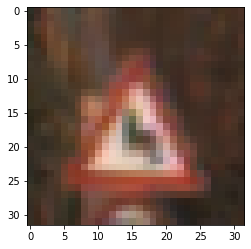

In [0]:
index = np.random.randint(1, len(x_train))
plt.imshow(x_train[index])
print("image label={}".format(y_train[index]))

Image Pre-Processing (Grayscale conversion, Histogram equalization and Normalization)

In [0]:
#Data Shuffling

from sklearn.utils import shuffle
x_train , y_train = shuffle(x_train,y_train)

In [0]:
def preprocessing(img):
  
  #grayscale conversion
  img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

  #histogram equalisation
  img  = cv2.equalizeHist(img)

  #normalisation
  img = img/255

  return img


In [0]:
x_train_processed = np.array(list(map(preprocessing, x_train)))
x_valid_processed = np.array(list(map(preprocessing, x_valid)))
x_test_processed = np.array(list(map(preprocessing, x_test)))

In [0]:
x_train_processed = x_train_processed.reshape(34799,32,32,1)
x_valid_processed = x_valid_processed.reshape(4410,32,32,1)
x_test_processed = x_test_processed.reshape(12630,32,32,1)

In [0]:
print(x_train_processed.shape)
print(x_valid_processed.shape)
print(x_test_processed.shape)

(34799, 32, 32, 1)
(4410, 32, 32, 1)
(12630, 32, 32, 1)


Comparing the original image and the pre-processed image

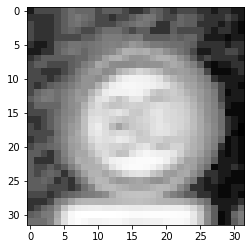

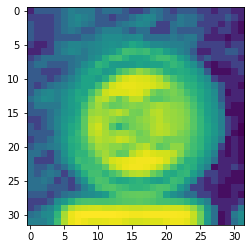

In [0]:
i = random.randint(1, len(x_train))
plt.imshow(x_train_processed[i].squeeze(), cmap='gray')
plt.figure()
plt.imshow(x_train_processed[i].squeeze())

Building the CNN Model

In [0]:
#define model
model = Sequential()

#add convolutional layer
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,1)))

#to reduce the size preserving the quality
model.add(MaxPooling2D(pool_size=(2,2)))

#add Dropout layer
model.add(Dropout(0.25))

#another convolutional layer
model.add(Conv2D(64,(5,5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())

#add dense layer
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(43,activation='softmax'))

#check the summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 256)              

Compile the model

In [0]:
model.compile(Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

Fitting our data to the model

In [0]:
history = model.fit(x_train_processed,y_train,batch_size=500,epochs=35,verbose=1,validation_data=(x_valid_processed,y_valid))

Train on 34799 samples, validate on 4410 samples
Epoch 1/35
34799/34799 [==============================] - 54s 2ms/step - loss: 3.5771 - accuracy: 0.0608 - val_loss: 3.4702 - val_accuracy: 0.1728
Epoch 2/35
34799/34799 [==============================] - 54s 2ms/step - loss: 3.2657 - accuracy: 0.1701 - val_loss: 3.0115 - val_accuracy: 0.3556
Epoch 3/35
34799/34799 [==============================] - 54s 2ms/step - loss: 2.6554 - accuracy: 0.3449 - val_loss: 2.3538 - val_accuracy: 0.4317
Epoch 4/35
34799/34799 [==============================] - 54s 2ms/step - loss: 2.1551 - accuracy: 0.4352 - val_loss: 1.8980 - val_accuracy: 0.5118
Epoch 5/35
34799/34799 [==============================] - 54s 2ms/step - loss: 1.8212 - accuracy: 0.4952 - val_loss: 1.5742 - val_accuracy: 0.5798
Epoch 6/35
34799/34799 [==============================] - 54s 2ms/step - loss: 1.5826 - accuracy: 0.5500 - val_loss: 1.3400 - val_accuracy: 0.6553
Epoch 7/35
34799/34799 [==============================] - 54s 2ms/ste

Evaluate the performance of the model

In [0]:
score = model.evaluate(x_test_processed,y_test)
print(score[1])

12630/12630 [==============================] - 6s 436us/step
0.8982580900192261


In [0]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

Text(0, 0.5, 'loss')

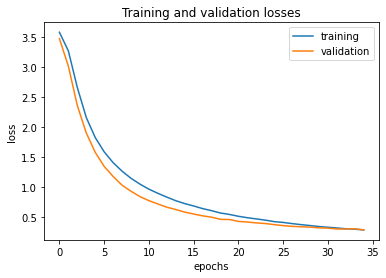

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'])
plt.title('Training and validation losses')
plt.xlabel('epochs')
plt.ylabel('loss')

Text(0, 0.5, 'accuracy')

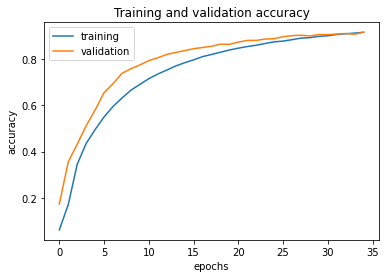

In [0]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['training','validation'])
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [0]:
prediction = model.predict_classes(x_test_processed)
y_true_label = y_test

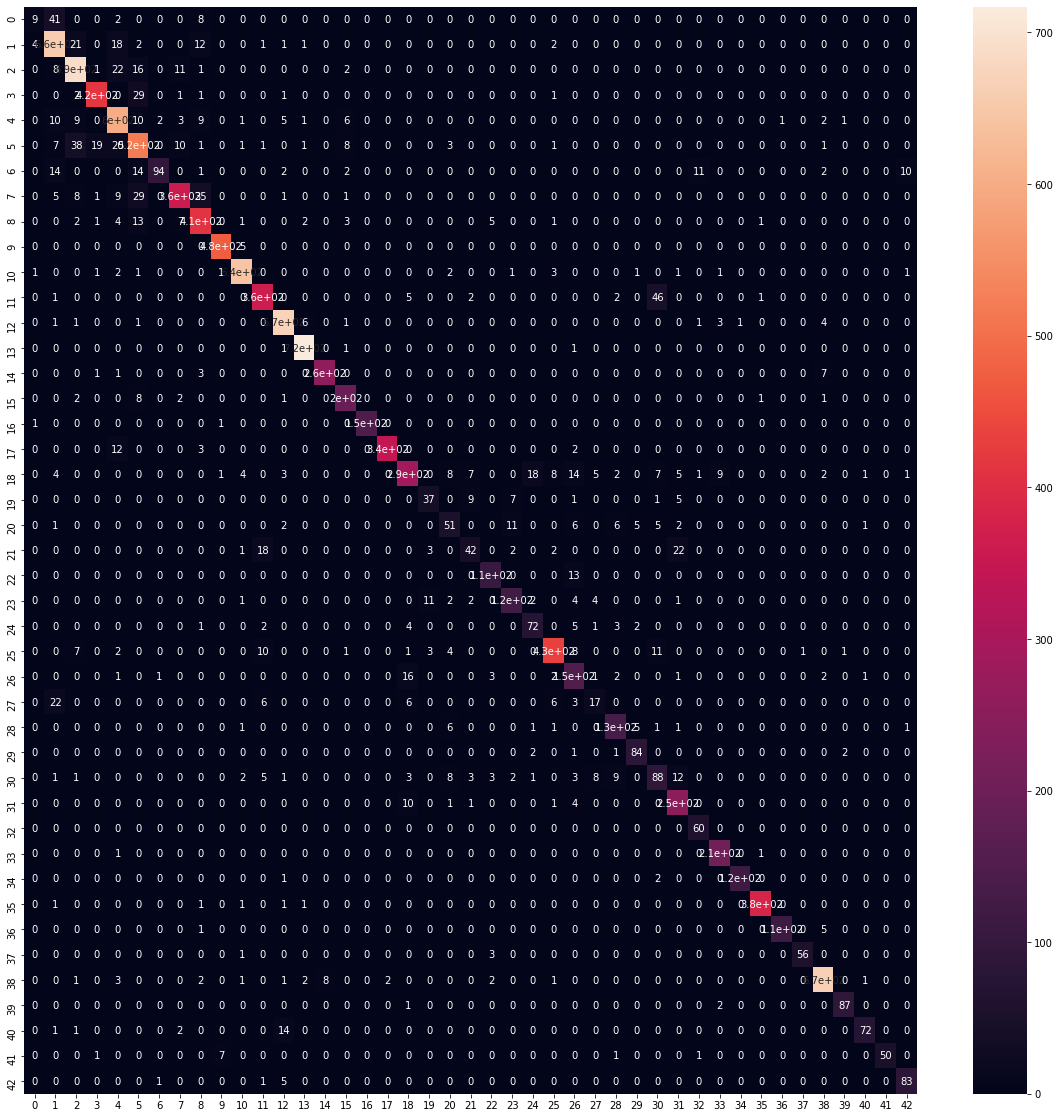

In [0]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_true_label,prediction)
plt.figure(figsize=(20,20))
sn.heatmap(matrix,annot=True)

Displaying True and Predicted 

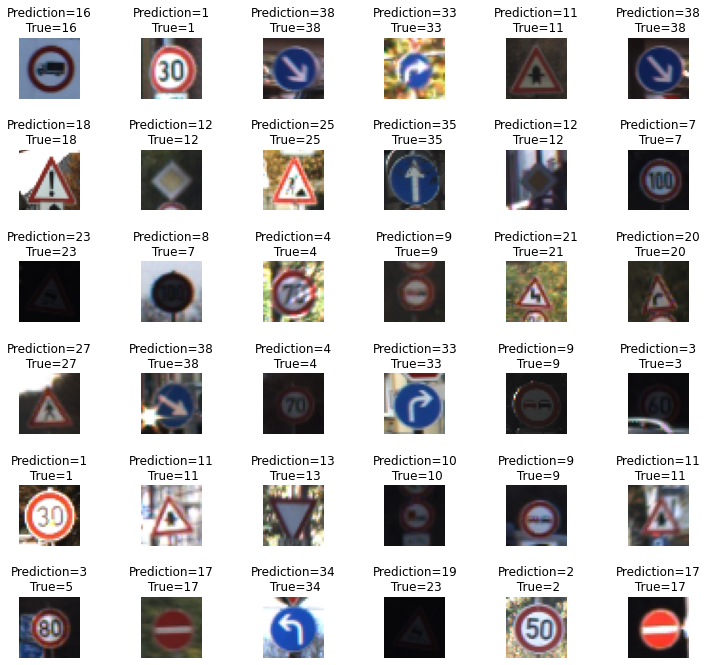

In [0]:
L=6
W=6
fig, axes = plt.subplots(L,W,figsize=(12,12))
axes = axes.ravel()

for i in range(0,L*W):
  axes[i].imshow(x_test[i])
  axes[i].set_title('Prediction={}\n True={}'.format(prediction[i],y_true_label[i]))
  axes[i].axis('off')
plt.subplots_adjust(wspace=1)

Save the model for further use

In [0]:
model.save('model.h5')